In [11]:
print('Hello')

Hello


In [12]:
!python -m pip show pandas scikit-learn

Name: pandas
Version: 2.1.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

In [13]:
!pip install pandas matplotlib scikit-learn seaburn numpy plotly

ERROR: Could not find a version that satisfies the requirement seaburn (from versions: none)
ERROR: No matching distribution found for seaburn


In [14]:
import pandas as pd

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [16]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [17]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [18]:
numericals = df.select_dtypes(include = 'number')
numericals

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [19]:
categorical = df.select_dtypes(include = 'object')
categorical

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [20]:
df['Income Category'] = df['Income_Category'].str.extract(r'(\d+)') # .......... extract all numericals from the column and save it to a new column
df['Income Category'] = df['Income Category'].astype(float) # .................. Turn the new column to a numerical datatype

In [21]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40.0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0


In [22]:
df.drop('Income_Category', axis = 1, inplace = True)

In [23]:
df.drop('CLIENTNUM', axis = 1, inplace = True)

In [24]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category
0,Existing Customer,45,M,3,High School,Married,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0
1,Existing Customer,49,F,5,Graduate,Single,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0
2,Existing Customer,51,M,3,Graduate,Married,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0
3,Existing Customer,40,F,4,High School,Unknown,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40.0
4,Existing Customer,40,M,3,Uneducated,Married,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0


<Axes: xlabel='Credit_Limit', ylabel='Count'>

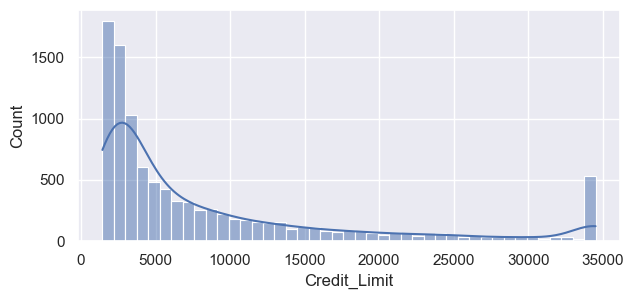

In [25]:
plt.figure(figsize = (7,3))
sns.set(style = 'darkgrid')
sns.histplot(data=df, x='Credit_Limit', kde=True)  

<Axes: xlabel='Customer_Age', ylabel='Count'>

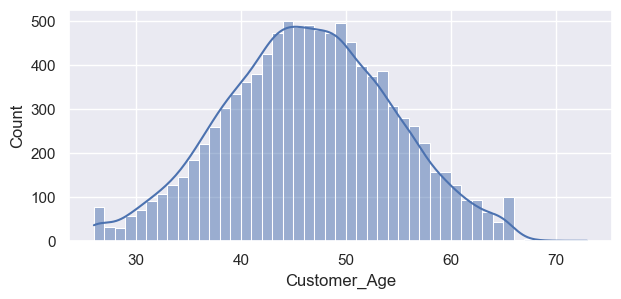

In [26]:
plt.figure(figsize = (7,3))
sns.set(style = 'darkgrid')
sns.histplot(data=df, x='Customer_Age', kde=True)

<Axes: xlabel='Customer_Age'>

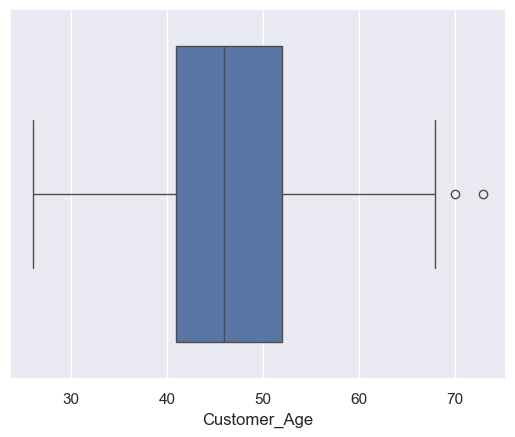

In [27]:
sns.boxplot(x = df['Customer_Age'])

<Axes: xlabel='Customer_Age', ylabel='count'>

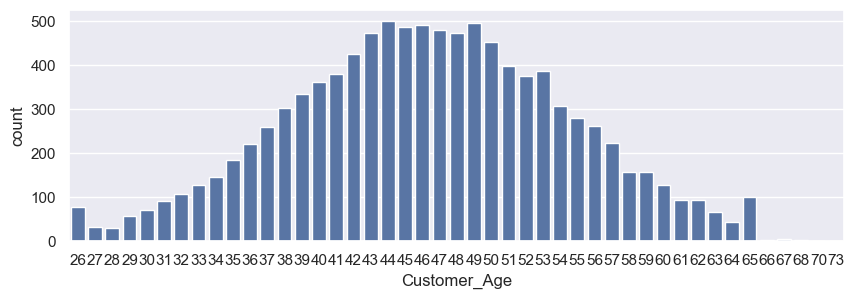

In [28]:

plt.figure(figsize = (10, 3))
sns.countplot(data=df, x= 'Customer_Age')


<Axes: xlabel='Total_Revolving_Bal', ylabel='Count'>

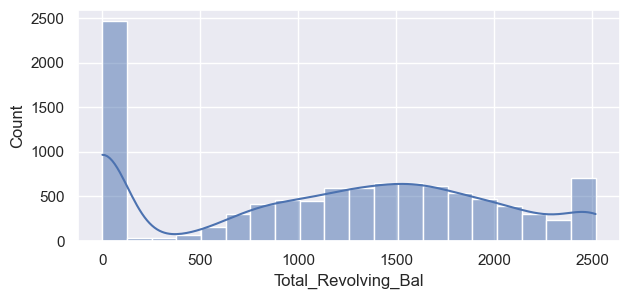

In [29]:
plt.figure(figsize = (7,3))
sns.set(style = 'darkgrid')
sns.histplot(data=df, x='Total_Revolving_Bal', kde=True)

Text(0.5, 1.0, 'Gender With Total_Revolving Made')

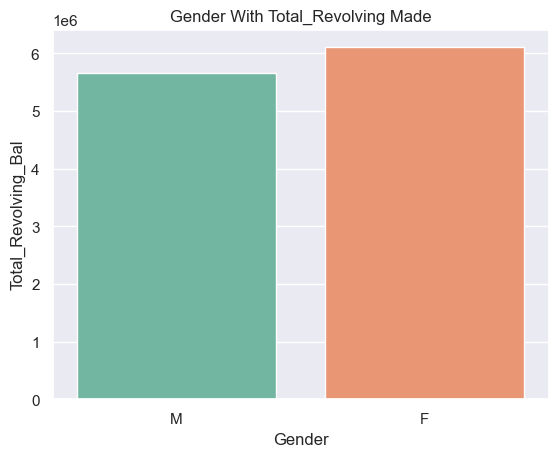

In [30]:

sns.barplot(data=df, x='Gender', y='Total_Revolving_Bal', estimator = 'sum', palette = 'Set2', ci = 0)
plt.title('Gender With Total_Revolving Made')

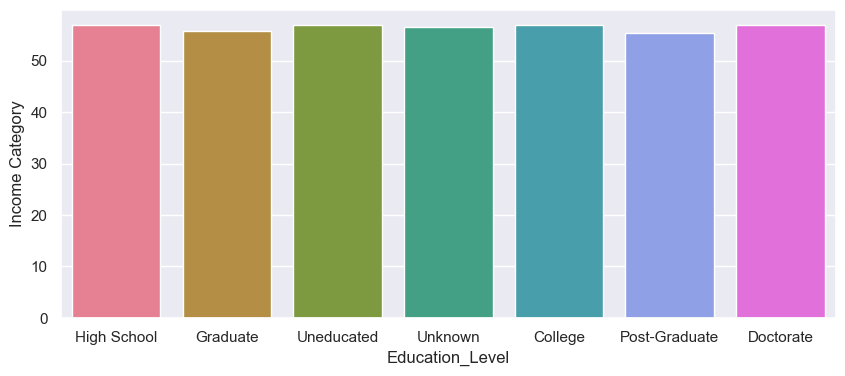

In [31]:
# Show the distribution of income according to education level

plt.figure(figsize = (10, 4))
fig = sns.barplot(x = df.Education_Level, y = df['Income Category'], ci = 0, palette = 'husl')


Text(0.5, 1.0, 'Customers Base On Card Credit')

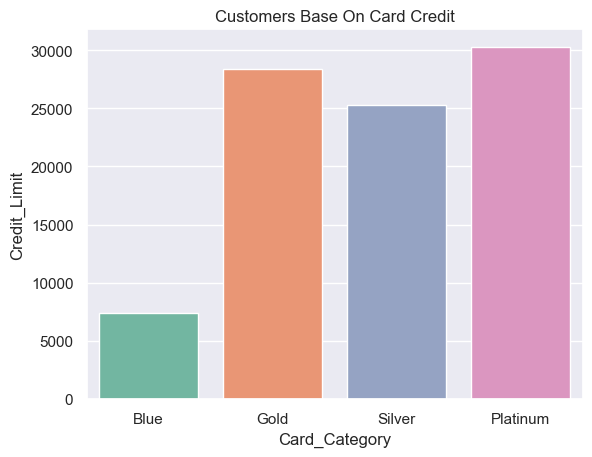

In [32]:
# Using Credit Limit as a metric, show the heirarchy of customers' importance based on card cateogry
sns.barplot(data=df, x='Card_Category', y='Credit_Limit', palette = 'Set2', estimator = 'mean', ci = 0)
plt.title('Customers Base On Card Credit')   

<Axes: xlabel='Card_Category', ylabel='count'>

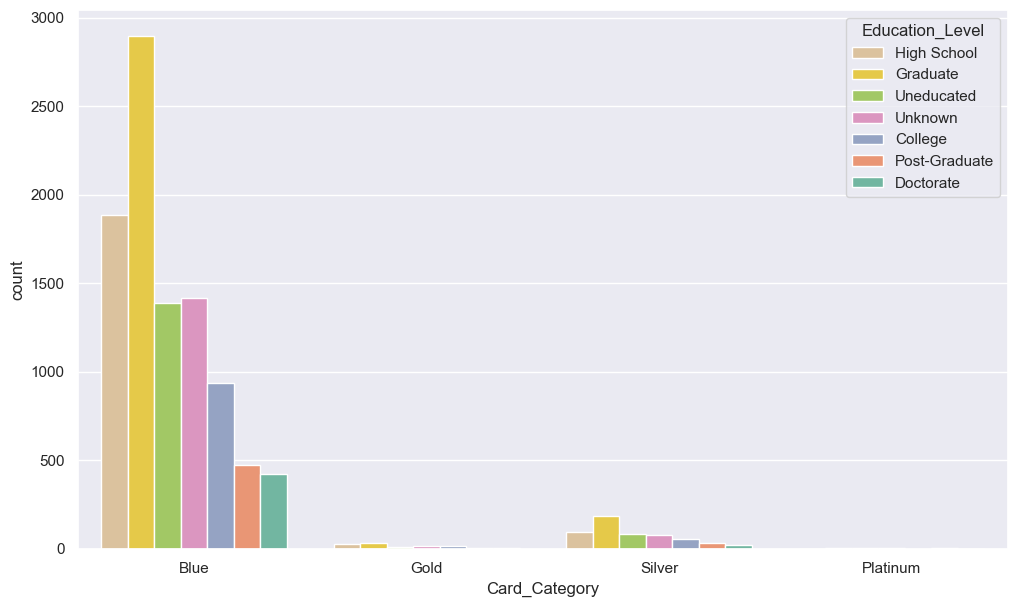

In [33]:
# Show the distribution of Education Level according to card category
plt.figure(figsize =(12,7))
sns.countplot(data=df, x='Card_Category', hue='Education_Level', palette = 'Set2_r')

<Axes: xlabel='Card_Category', ylabel='Customer_Age'>

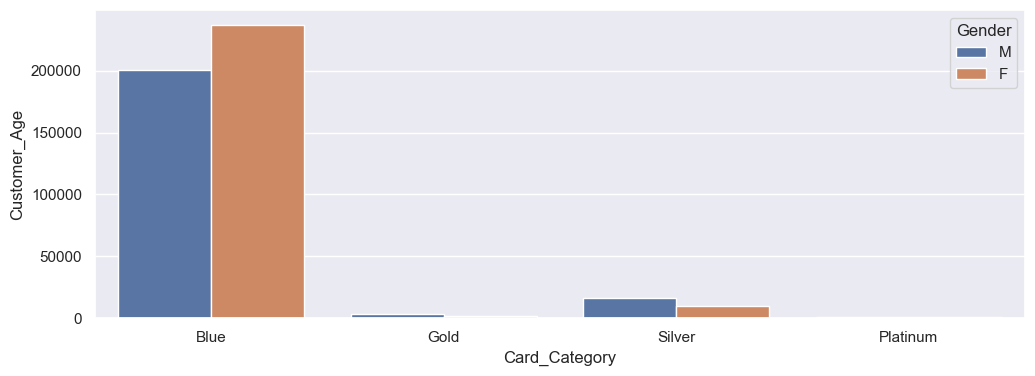

In [34]:
# Visualise the average age of each varying class category while showing their gender distribution
plt.figure(figsize = (12, 4))
sel = df[['Card_Category', 'Gender', 'Customer_Age']]
sns.set(style = 'darkgrid')
sns.barplot(data=df, x = 'Card_Category', y = 'Customer_Age', hue = 'Gender', ci = 0, estimator = 'sum')

<Axes: >

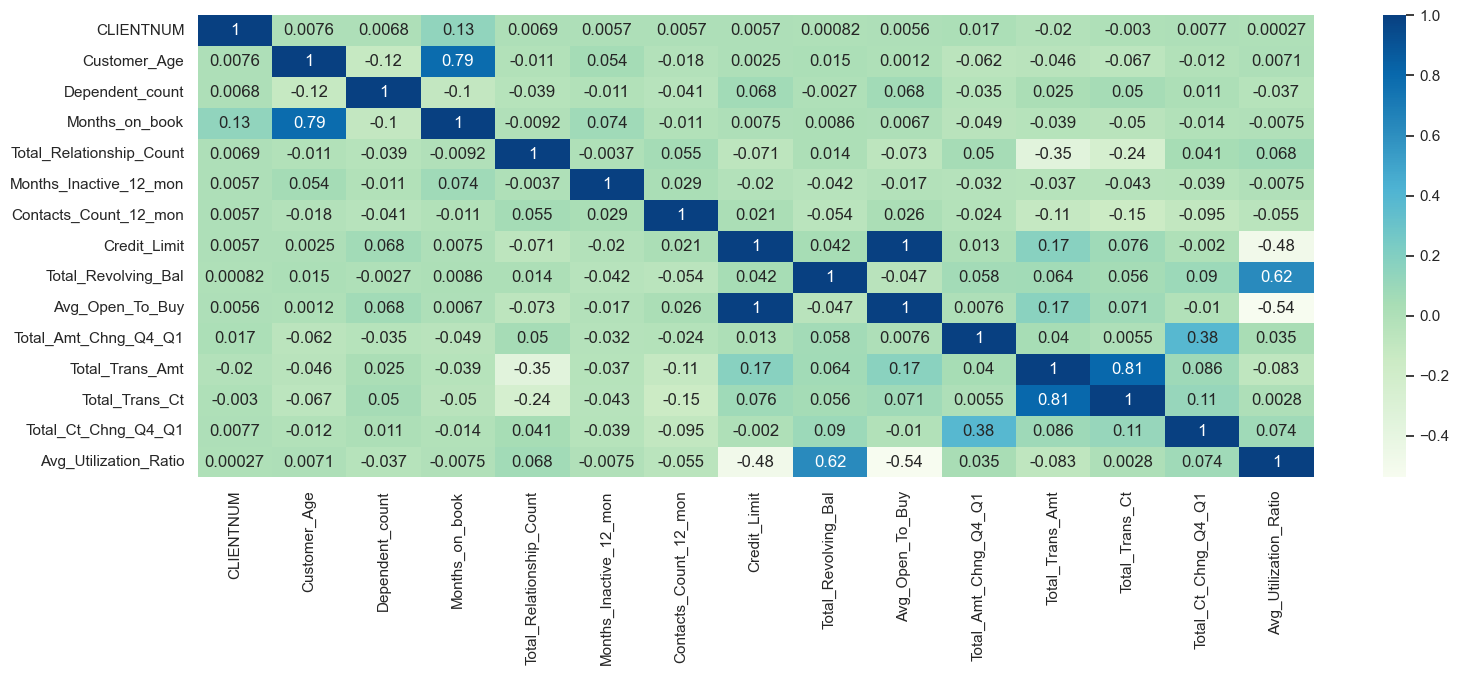

In [35]:
# Using a correlation matrix, visualize the relationship of all numerical values
plt.figure(figsize = (18, 6))
sns.heatmap(numericals.corr(), annot = True, cmap = 'GnBu')

In [36]:
birth = pd.Series([2024 - i for i in df['Customer_Age']])
df['Birth Year'] = birth

In [37]:
birth_year = []

for i in df['Customer_Age']:
    birth_year.append(2024 - i)

# convert new_list(birth_year) to series
birth_year = pd.Series(birth_year)
df['Birth Year'] = birth_year

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category,Birth Year
0,Existing Customer,45,M,3,High School,Married,Blue,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0,1979
1,Existing Customer,49,F,5,Graduate,Single,Blue,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0,1975
2,Existing Customer,51,M,3,Graduate,Married,Blue,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0,1973
3,Existing Customer,40,F,4,High School,Unknown,Blue,34,3,4,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40.0,1984
4,Existing Customer,40,M,3,Uneducated,Married,Blue,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0,1984


In [38]:
df.Marital_Status.value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [39]:
# Remove 'Unknown' Marital Status
df = df.loc[df['Marital_Status'] != 'Unknown']

In [40]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [41]:
df = df.loc[df['Education_Level'] != 'Unknown']

In [42]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [43]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in categorical.columns:
    if i in df.columns:
        df[i] = encoder.fit_transform(df[i])

df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category,Birth Year
0,1,45,1,3,3,1,0,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0,1979
1,1,49,0,5,2,2,0,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0,1975
2,1,51,1,3,2,1,0,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0,1973
4,1,40,1,3,5,1,0,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0,1984
5,1,44,1,2,2,1,0,36,3,1,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,40.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,1,54,1,1,3,2,0,34,5,2,...,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,60.0,1970
10121,1,56,0,1,2,2,0,50,4,1,...,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,40.0,1968
10122,1,50,1,2,2,2,0,40,3,2,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,40.0,1974
10124,0,44,0,1,3,1,0,36,5,3,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,40.0,1980


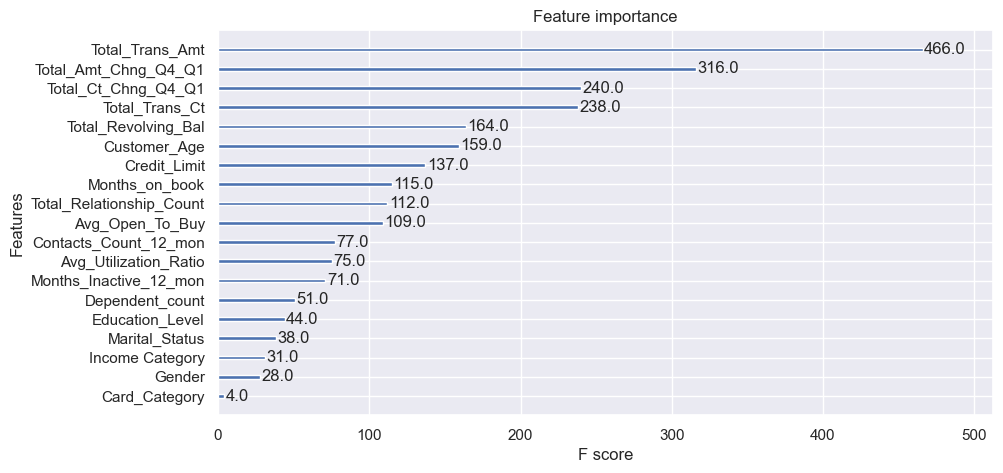

In [44]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = df.drop('Attrition_Flag', axis = 1)
y = df.Attrition_Flag

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [45]:
sel_columns = ['Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct',
 'Total_Revolving_Bal', 'Customer_Age', 'Credit_Limit', 'Attrition_Flag']

sel_data = df[sel_columns]
sel_data

,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Total_Revolving_Bal,Customer_Age,Credit_Limit,Attrition_Flag
0,1144,1.335,1.625,42,777,45,12691.0,1
1,1291,1.541,3.714,33,864,49,8256.0,1
2,1887,2.594,2.333,20,0,51,3418.0,1
4,816,2.175,2.500,28,0,40,4716.0,1
5,1088,1.376,0.846,24,1247,44,4010.0,1
...,...,...,...,...,...,...,...,...
10120,15577,0.660,0.754,114,2109,54,13940.0,1
10121,14596,0.570,0.791,120,606,56,3688.0,1
10122,15476,0.703,0.857,117,1851,50,4003.0,1
10124,10291,0.819,0.818,60,0,44,5409.0,0


MODEL SELECTION

<Axes: xlabel='Attrition_Flag', ylabel='count'>

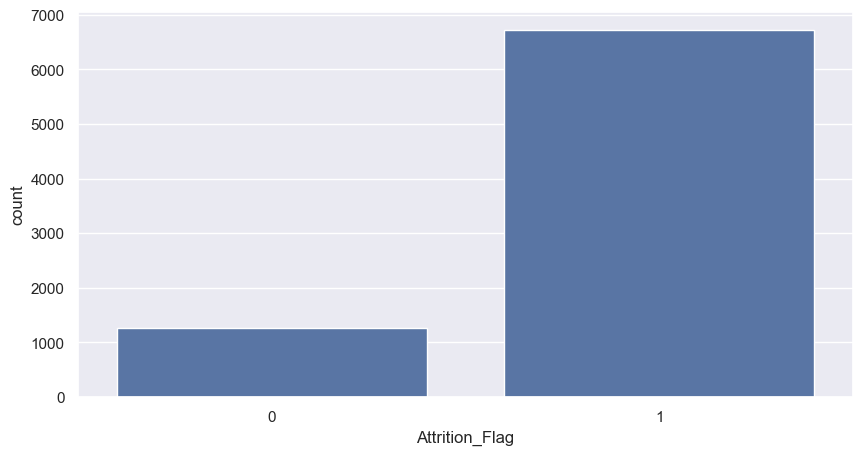

In [46]:
sns.countplot(x = df.Attrition_Flag)

In [47]:
x = sel_data.drop('Attrition_Flag', axis = 1)
y = sel_data.Attrition_Flag

# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 98, stratify = y)

Random Sampling


In [48]:
full_data = pd.concat([xtrain, ytrain], axis = 1)

class_0 = full_data.loc[full_data['Attrition_Flag'] == 0]
class_1 = full_data.loc[full_data['Attrition_Flag'] == 1]

print(f'Class of Zero shape: {class_0.shape}\nClass of One shape: {class_1.shape}')

Class of Zero shape: (1006, 8)
Class of One shape: (5372, 8)


In [49]:
new_class1 = class_1.sample(1000)
new_class1.shape

(1000, 8)

(2006, 8)


<Axes: xlabel='Attrition_Flag', ylabel='count'>

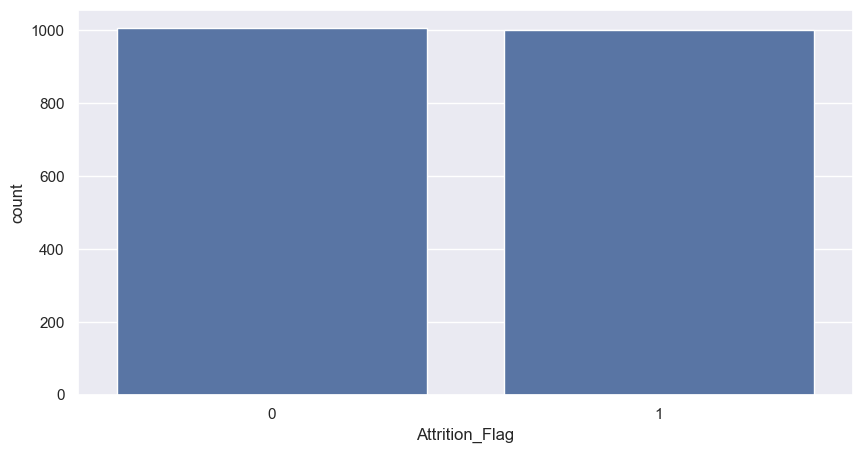

In [50]:
new_balanced_data = pd.concat([class_0, new_class1], axis = 0)
print(new_balanced_data.shape)

sns.set(style = 'darkgrid')
sns.countplot(x = new_balanced_data['Attrition_Flag'])

In [51]:
new_balanced_data

,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Total_Revolving_Bal,Customer_Age,Credit_Limit,Attrition_Flag
9926,9451,0.915,0.646,79,2517,29,6500.0,0
7118,2684,0.721,0.560,39,2517,45,3489.0,0
7948,2156,0.496,0.194,37,0,41,1655.0,0
6810,2616,0.791,0.469,47,0,50,3546.0,0
6534,2245,0.491,0.464,41,2404,41,2811.0,0
...,...,...,...,...,...,...,...,...
8271,4957,0.753,0.765,90,2025,40,10880.0,1
5949,4172,0.794,0.970,65,0,50,2719.0,1
3931,3880,0.801,0.811,67,0,65,7636.0,1
255,1737,0.969,1.600,26,1152,55,2358.0,1


Random Oversampling Using Synthetic Minority Oversampling Technique


In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= 'auto', random_state=5)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

<Axes: xlabel='Attrition_Flag', ylabel='count'>

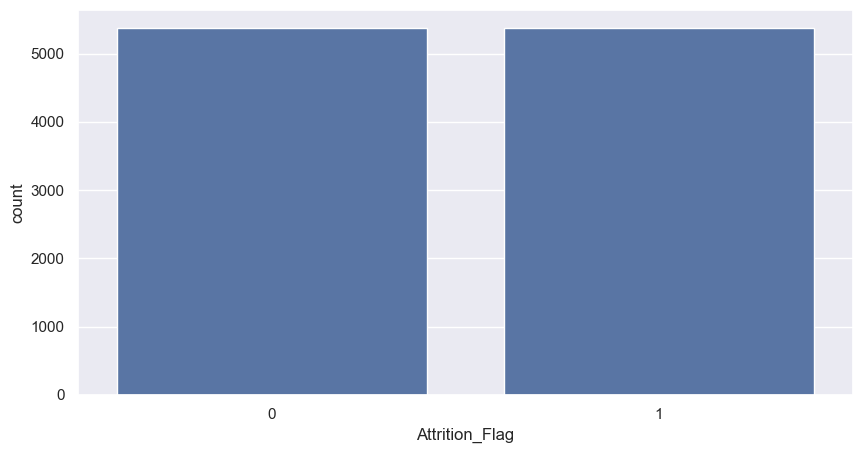

In [53]:
new_balanced_data_smote = pd.concat([X_resampled, y_resampled], axis = 1)

sns.countplot(x = new_balanced_data_smote['Attrition_Flag'])

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression() # ----------------------------------------------- Instantiate the algorithm

log_reg.fit(X_resampled, y_resampled ) # -------------------------------------------------- Fit the algorithm on the data to create a model
cross_val = log_reg.predict(X_resampled) # ----------------------------------------- Cros validate the model
print(classification_report(cross_val, y_resampled)) # ----------------------------- View the classification metrics of the model

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5336
           1       0.78      0.77      0.77      5408

    accuracy                           0.77     10744
   macro avg       0.77      0.77      0.77     10744
weighted avg       0.77      0.77      0.77     10744



In [55]:
# getting the best random to use for the smote
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

scores = [] # -------------------------------------------------------------- Create a list to store the scores of each loop
for i in range(100):
    smote = SMOTE(sampling_strategy= 'auto', random_state= i)
    X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

    # Creating a model
    model= LogisticRegression()
    model.fit(X_resampled, y_resampled)

    scores.append(accuracy_score(model.predict(X_resampled), y_resampled))

In [56]:
import numpy as np
print(f'Best Random State To Use: {np.array(scores).argmax()}')

Best Random State To Use: 29


In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= 'auto', random_state=29)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

In [58]:
log_reg = LogisticRegression() # ----------------------------------------------- Instantiate the algorithm

log_reg.fit(X_resampled, y_resampled ) # -------------------------------------------------- Fit the algorithm on the data to create a model
cross_val = log_reg.predict(X_resampled) # ----------------------------------------- Cros validate the model
print(classification_report(cross_val, y_resampled)) # ----------------------------- View the classification metrics of the model

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      5381
           1       0.83      0.83      0.83      5363

    accuracy                           0.83     10744
   macro avg       0.83      0.83      0.83     10744
weighted avg       0.83      0.83      0.83     10744



In [59]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [60]:
def modeller(x_train, y_train, x_test, y_test, show_train_score = None):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from xgboost import XGBClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    # list of algorithms to be used
    algorithms = [RandomForestClassifier(), XGBClassifier(), DecisionTreeClassifier(), SVC(kernel = 'poly'), LogisticRegression()]

    # keep the training and test scores
    scores = []
    train_validator = []

    for i in algorithms:
        model_name = i
        model_name.fit(x_train, y_train)
        model_validate = model_name.predict(x_train)
        train_validator.append(accuracy_score(model_validate, y_train))

        test_perf = model_name.predict(x_test)
        scores.append(accuracy_score(test_perf, y_test))

    # create a table for each algorithms and scores
    compare_table = pd.DataFrame()
    compare_table['Algorithm'] = pd.Series(algorithms)
    compare_table['Accuracy'] = pd.Series(scores)

    if show_train_score == 'show_train':
        compare_table['Training Accuracy'] = pd.Series(train_validator)
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]
    else:
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]


table, model1, model2 = modeller(X_resampled, y_resampled, xtest, ytest, show_train_score = 'show_train')
table

,Algorithm,Accuracy,Training Accuracy
1,"XGBClassifier(base_score=None, booster=None, c...",0.958621,0.999628
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.956740,1.000000
2,DecisionTreeClassifier(),0.936677,1.000000
4,LogisticRegression(),0.822571,0.827345
3,SVC(kernel='poly'),0.427586,0.631422


In [62]:
from sklearn.metrics import confusion_matrix, classification_report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5376
           1       1.00      1.00      1.00      5368

    accuracy                           1.00     10744
   macro avg       1.00      1.00      1.00     10744
weighted avg       1.00      1.00      1.00     10744



<Axes: >

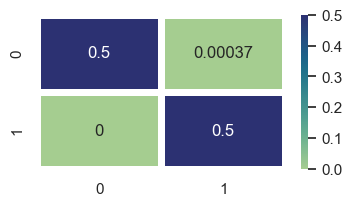

In [63]:
# --------- XGBOOST CLASSIFIER MODELLING --------------
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(X_resampled, y_resampled)

cross_validation = xgb_model.predict(X_resampled)
print(classification_report(cross_validation, y_resampled))

revealer = confusion_matrix(cross_validation, y_resampled)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

RANDOM FOREST CLASSIFIER MODELLING


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5372
           1       1.00      1.00      1.00      5372

    accuracy                           1.00     10744
   macro avg       1.00      1.00      1.00     10744
weighted avg       1.00      1.00      1.00     10744



<Axes: >

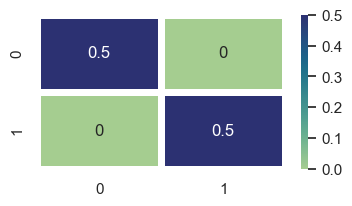

In [64]:
from sklearn.ensemble import RandomForestClassifier
rand_model = RandomForestClassifier()

rand_model.fit(X_resampled, y_resampled)

cross_validation = rand_model.predict(X_resampled)
print(classification_report(cross_validation, y_resampled))

revealer = confusion_matrix(cross_validation, y_resampled)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

CHECK FOR OVERFITTING

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       281
           1       0.96      0.99      0.97      1314

    accuracy                           0.96      1595
   macro avg       0.94      0.91      0.92      1595
weighted avg       0.96      0.96      0.96      1595



<Axes: >

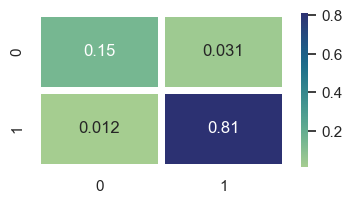

In [65]:
test_prediction = rand_model.predict(xtest)
print(classification_report(test_prediction, ytest))

revealer = confusion_matrix(test_prediction, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [66]:
# Export the model
import pickle, joblib

pickle.dump(rand_model, open('bankChurners_model.pkl', "wb"))

In [68]:
imported_model = joblib.load('bankChurners_model.pkl')
imported_model

RandomForestClassifier()

In [69]:
pd.concat([xtest, ytest], axis = 1)

,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Total_Revolving_Bal,Customer_Age,Credit_Limit,Attrition_Flag
3186,3730,0.836,0.941,66,1153,50,2845.0,1
251,1765,1.363,1.615,34,1125,73,4469.0,1
9774,15226,0.995,0.712,113,1816,43,34516.0,1
10083,15905,0.695,0.708,111,0,42,8348.0,1
5998,1895,0.531,0.400,42,0,47,3502.0,0
...,...,...,...,...,...,...,...,...
1386,1776,0.875,0.571,44,1719,42,4147.0,1
70,1550,1.266,1.050,41,1763,51,34516.0,1
5027,4804,0.890,0.737,66,2517,42,4540.0,1
6959,4627,0.674,0.659,68,2517,58,3008.0,1


In [70]:
imported_model.predict([[15226, 	0.995, 	0.712 ,	113 	,1816 ,	43 ,	34516.0 	]])

array([1])